In [125]:
#Add Python module called Mediapipe
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
# Import the much needed stuff for training
import pandas as pd
import numpy as np
import tensorflow as tf
import mediapipe as mp
import os
import csv
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import to_categorical

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

# Checking Tensorflow Version
tf.__version__

'2.12.0'

In [127]:
# Function to Extract Feature from images or Frame
def extract_feature(input_image):
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils 
    image = cv.imread(input_image)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.1) as hands:
        while True:
            results = hands.process(cv.flip(cv.cvtColor(image, cv.COLOR_BGR2RGB), 1))
            image_height, image_width, _ = image.shape
            # Print handedness (left v.s. right hand).
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Handedness of {input_image}:')
            #print(results.multi_handedness)

            # Draw hand landmarks of each hand.
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Hand landmarks of {input_image}:')
            if not results.multi_hand_landmarks:
                # Here we will set whole landmarks into zero as no handpose detected
                # in a picture wanted to extract.
                
                # Wrist Hand
                wristX = 0
                wristY = 0
                wristZ = 0
                
                # Thumb Finger
                thumb_CmcX = 0
                thumb_CmcY = 0
                thumb_CmcZ = 0
                
                thumb_McpX = 0
                thumb_McpY = 0
                thumb_McpZ = 0
                
                thumb_IpX = 0
                thumb_IpY = 0
                thumb_IpZ = 0
                
                thumb_TipX = 0
                thumb_TipY = 0
                thumb_TipZ = 0

                # Index Finger
                index_McpX = 0
                index_McpY = 0
                index_McpZ = 0
                
                index_PipX = 0
                index_PipY = 0
                index_PipZ = 0
                
                index_DipX = 0
                index_DipY = 0
                index_DipZ = 0
                
                index_TipX = 0
                index_TipY = 0
                index_TipZ = 0

                # Middle Finger
                middle_McpX = 0
                middle_McpY = 0
                middle_McpZ = 0
                
                middle_PipX = 0
                middle_PipY = 0
                middle_PipZ = 0
                
                middle_DipX = 0
                middle_DipY = 0
                middle_DipZ = 0
                
                middle_TipX = 0
                middle_TipY = 0
                middle_TipZ = 0

                # Ring Finger
                ring_McpX = 0
                ring_McpY = 0
                ring_McpZ = 0
                
                ring_PipX = 0
                ring_PipY = 0
                ring_PipZ = 0
                
                ring_DipX = 0
                ring_DipY = 0
                ring_DipZ = 0
                
                ring_TipX = 0
                ring_TipY = 0
                ring_TipZ = 0

                # Pinky Finger
                pinky_McpX = 0
                pinky_McpY = 0
                pinky_McpZ = 0
                
                pinky_PipX = 0
                pinky_PipY = 0
                pinky_PipZ = 0
                
                pinky_DipX = 0
                pinky_DipY = 0
                pinky_DipZ = 0
                
                pinky_TipX = 0
                pinky_TipY = 0
                pinky_TipZ = 0
                
                # Set image to Zero
                annotated_image = 0

                # Return Whole Landmark and Image
                return (wristX, wristY, wristZ,
                        thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                        thumb_McpX, thumb_McpY, thumb_McpZ,
                        thumb_IpX, thumb_IpY, thumb_IpZ,
                        thumb_TipX, thumb_TipY, thumb_TipZ,
                        index_McpX, index_McpY, index_McpZ,
                        index_PipX, index_PipY, index_PipZ,
                        index_DipX, index_DipY, index_DipZ,
                        index_TipX, index_TipY, index_TipZ,
                        middle_McpX, middle_McpY, middle_McpZ,
                        middle_PipX, middle_PipY, middle_PipZ,
                        middle_DipX, middle_DipY, middle_DipZ,
                        middle_TipX, middle_TipY, middle_TipZ,
                        ring_McpX, ring_McpY, ring_McpZ,
                        ring_PipX, ring_PipY, ring_PipZ,
                        ring_DipX, ring_DipY, ring_DipZ,
                        ring_TipX, ring_TipY, ring_TipZ,
                        pinky_McpX, pinky_McpY, pinky_McpZ,
                        pinky_PipX, pinky_PipY, pinky_PipZ,
                        pinky_DipX, pinky_DipY, pinky_DipZ,
                        pinky_TipX, pinky_TipY, pinky_TipZ,
                        annotated_image)
            
            annotated_image = cv.flip(image.copy(), 1)
            for hand_landmarks in results.multi_hand_landmarks:
                # Wrist Hand /  Pergelangan Tangan
                wristX = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * image_width
                wristY = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * image_height
                wristZ = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].z

                # Thumb Finger / Ibu Jari
                thumb_CmcX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * image_width
                thumb_CmcY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * image_height
                thumb_CmcZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].z
                
                thumb_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * image_width
                thumb_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * image_height
                thumb_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].z
                
                thumb_IpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * image_width
                thumb_IpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * image_height
                thumb_IpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].z
                
                thumb_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
                thumb_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_height
                thumb_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].z

                # Index Finger / Jari Telunjuk
                index_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * image_width
                index_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * image_height
                index_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].z
                
                index_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * image_width
                index_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * image_height
                index_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].z
                
                index_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * image_width
                index_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * image_height
                index_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].z
                
                index_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
                index_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
                index_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].z

                # Middle Finger / Jari Tengah
                middle_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * image_width
                middle_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * image_height
                middle_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].z
                
                middle_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * image_width
                middle_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * image_height
                middle_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].z
                
                middle_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * image_width
                middle_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * image_height
                middle_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].z
                
                middle_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
                middle_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_height
                middle_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].z

                # Ring Finger / Jari Cincin
                ring_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * image_width
                ring_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * image_height
                ring_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].z
                
                ring_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * image_width
                ring_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * image_height
                ring_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].z
                
                ring_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * image_width
                ring_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * image_height
                ring_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].z
                
                ring_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
                ring_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height
                ring_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].z

                # Pinky Finger / Jari Kelingking
                pinky_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * image_width
                pinky_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * image_height
                pinky_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].z
                
                pinky_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * image_width
                pinky_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * image_height
                pinky_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].z
                
                pinky_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * image_width
                pinky_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * image_height
                pinky_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].z
                
                pinky_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width
                pinky_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_height
                pinky_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].z

                # Draw the Skeleton
                mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                
            return (wristX, wristY, wristZ,
                    thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                    thumb_McpX, thumb_McpY, thumb_McpZ,
                    thumb_IpX, thumb_IpY, thumb_IpZ,
                    thumb_TipX, thumb_TipY, thumb_TipZ,
                    index_McpX, index_McpY, index_McpZ,
                    index_PipX, index_PipY, index_PipZ,
                    index_DipX, index_DipY, index_DipZ,
                    index_TipX, index_TipY, index_TipZ,
                    middle_McpX, middle_McpY, middle_McpZ,
                    middle_PipX, middle_PipY, middle_PipZ,
                    middle_DipX, middle_DipY, middle_DipZ,
                    middle_TipX, middle_TipY, middle_TipZ,
                    ring_McpX, ring_McpY, ring_McpZ,
                    ring_PipX, ring_PipY, ring_PipZ,
                    ring_DipX, ring_DipY, ring_DipZ,
                    ring_TipX, ring_TipY, ring_TipZ,
                    pinky_McpX, pinky_McpY, pinky_McpZ,
                    pinky_PipX, pinky_PipY, pinky_PipZ,
                    pinky_DipX, pinky_DipY, pinky_DipZ,
                    pinky_TipX, pinky_TipY, pinky_TipZ,
                    annotated_image)

In [128]:
#Function to create CSV file or add dataset to the existed CSV file
def toCSV(filecsv, class_type,
          wristX, wristY, wristZ,
          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
          thumb_McpX, thumb_McpY, thumb_McpZ,
          thumb_IpX, thumb_IpY, thumb_IpZ,
          thumb_TipX, thumb_TipY, thumb_TipZ,
          index_McpX, index_McpY, index_McpZ,
          index_PipX, index_PipY, index_PipZ,
          index_DipX, index_DipY, index_DipZ,
          index_TipX, index_TipY, index_TipZ,
          middle_McpX, middle_McpY, middle_McpZ,
          middle_PipX, middle_PipY, middle_PipZ,
          middle_DipX, middle_DipY, middle_DipZ,
          middle_TipX, middle_TipY, middle_TipZ,
          ring_McpX, ring_McpY, ring_McpZ,
          ring_PipX, ring_PipY, ring_PipZ,
          ring_DipX, ring_DipY, ring_DipZ,
          ring_TipX, ring_TipY, ring_TipZ,
          pinky_McpX, pinky_McpY, pinky_McpZ,
          pinky_PipX, pinky_PipY, pinky_PipZ,
          pinky_DipX, pinky_DipY, pinky_DipZ,
          pinky_TipX, pinky_TipY, pinky_TipZ):
    if os.path.isfile(filecsv):
        #print ("File exist thus shall write append to the file")
        with open(filecsv, 'a+', newline='') as file:
            # Create a writer object from csv module
            writer = csv.writer(file)
            writer.writerow([class_type,
                             wristX, wristY, wristZ,
                             thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                             thumb_McpX, thumb_McpY, thumb_McpZ,
                             thumb_IpX, thumb_IpY, thumb_IpZ,
                             thumb_TipX, thumb_TipY, thumb_TipZ,
                             index_McpX, index_McpY, index_McpZ,
                             index_PipX, index_PipY, index_PipZ,
                             index_DipX, index_DipY, index_DipZ,
                             index_TipX, index_TipY, index_TipZ,
                             middle_McpX, middle_McpY, middle_McpZ,
                             middle_PipX, middle_PipY, middle_PipZ,
                             middle_DipX, middle_DipY, middle_DipZ,
                             middle_TipX, middle_TipY, middle_TipZ,
                             ring_McpX, ring_McpY, ring_McpZ,
                             ring_PipX, ring_PipY, ring_PipZ,
                             ring_DipX, ring_DipY, ring_DipZ,
                             ring_TipX, ring_TipY, ring_TipZ,
                             pinky_McpX, pinky_McpY, pinky_McpZ,
                             pinky_PipX, pinky_PipY, pinky_PipZ,
                             pinky_DipX, pinky_DipY, pinky_DipZ,
                             pinky_TipX, pinky_TipY, pinky_TipZ])
    else:
        #print ("File not exist thus shall create new file as", filecsv)
        with open(filecsv, 'w', newline='') as file:
            # Create a writer object from csv module
            writer = csv.writer(file)
            writer.writerow(["class_type",
                             "wristX", "wristY", "wristZ",
                             "thumb_CmcX", "thumb_CmcY", "thumb_CmcZ",
                             "thumb_McpX", "thumb_McpY", "thumb_McpZ",
                             "thumb_IpX", "thumb_IpY", "thumb_IpZ",
                             "thumb_TipX", "thumb_TipY", "thumb_TipZ",
                             "index_McpX", "index_McpY", "index_McpZ",
                             "index_PipX", "index_PipY", "index_PipZ",
                             "index_DipX", "index_DipY", "index_DipZ",
                             "index_TipX", "index_TipY", "index_TipZ",
                             "middle_McpX", "middle_McpY", "middle_McpZ",
                             "middle_PipX", "middle_PipY", "middle_PipZ",
                             "middle_DipX", "middle_DipY", "middle_DipZ",
                             "middle_TipX", "middle_TipY", "middle_TipZ",
                             "ring_McpX", "ring_McpY", "ring_McpZ",
                             "ring_PipX", "ring_PipY", "ring_PipZ",
                             "ring_DipX", "ring_DipY", "ring_DipZ",
                             "ring_TipX", "ring_TipY", "ring_TipZ",
                             "pinky_McpX", "pinky_McpY", "pinky_McpZ",
                             "pinky_PipX", "pinky_PipY", "pinky_PipZ",
                             "pinky_DipX", "pinky_DipY", "pinky_DipZ",
                             "pinky_TipX", "pinky_TipY", "pinky_TipZ"])
            writer.writerow([class_type,
                             wristX, wristY, wristZ,
                             thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                             thumb_McpX, thumb_McpY, thumb_McpZ,
                             thumb_IpX, thumb_IpY, thumb_IpZ,
                             thumb_TipX, thumb_TipY, thumb_TipZ,
                             index_McpX, index_McpY, index_McpZ,
                             index_PipX, index_PipY, index_PipZ,
                             index_DipX, index_DipY, index_DipZ,
                             index_TipX, index_TipY, index_TipZ,
                             middle_McpX, middle_McpY, middle_McpZ,
                             middle_PipX, middle_PipY, middle_PipZ,
                             middle_DipX, middle_DipY, middle_DipZ,
                             middle_TipX, middle_TipY, middle_TipZ,
                             ring_McpX, ring_McpY, ring_McpZ,
                             ring_PipX, ring_PipY, ring_PipZ,
                             ring_DipX, ring_DipY, ring_DipZ,
                             ring_TipX, ring_TipY, ring_TipZ,
                             pinky_McpX, pinky_McpY, pinky_McpZ,
                             pinky_PipX, pinky_PipY, pinky_PipZ,
                             pinky_DipX, pinky_DipY, pinky_DipZ,
                             pinky_TipX, pinky_TipY, pinky_TipZ])

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
# Extract Feature for Training
# We will using SIBI datasets version V02
paths = "/content/drive/MyDrive/Data Bisindo/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/"
csv_path = "hands_SIBI_training.csv"

if os.path.exists(csv_path):
    img = cv2.imread(paths)
    print("CSV File does exist, going delete before start extraction and replace it with new")
    os.remove(csv_path)
else:
    print("The CSV file does not exist", csv_path, ",Going Create after Extraction")
    
for dirlist in os.listdir(paths):
    for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
        print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
        for filename in filenames:
            if filename.endswith(".jpg") or filename.endswith(".JPG"):
                #print(os.path.join(root, filename), True)
                (wristX, wristY, wristZ,
                 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                 thumb_McpX, thumb_McpY, thumb_McpZ,
                 thumb_IpX, thumb_IpY, thumb_IpZ,
                 thumb_TipX, thumb_TipY, thumb_TipZ,
                 index_McpX, index_McpY, index_McpZ,
                 index_PipX, index_PipY, index_PipZ,
                 index_DipX, index_DipY, index_DipZ,
                 index_TipX, index_TipY, index_TipZ,
                 middle_McpX, middle_McpY, middle_McpZ,
                 middle_PipX, middle_PipY, middle_PipZ,
                 middle_DipX, middle_DipY, middle_DipZ,
                 middle_TipX, middle_TipY, middle_TipZ,
                 ring_McpX, ring_McpY, ring_McpZ,
                 ring_PipX, ring_PipY, ring_PipZ,
                 ring_DipX, ring_DipY, ring_DipZ,
                 ring_TipX, ring_TipY, ring_TipZ,
                 pinky_McpX, pinky_McpY, pinky_McpZ,
                 pinky_PipX, pinky_PipY, pinky_PipZ,
                 pinky_DipX, pinky_DipY, pinky_DipZ,
                 pinky_TipX, pinky_TipY, pinky_TipZ,
                 annotated_image) = extract_feature(os.path.join(root, filename))
            
                if ((not wristX == 0) and (not wristY == 0)):
                    toCSV(csv_path, dirlist, 
                          wristX, wristY, wristZ,
                          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                          thumb_McpX, thumb_McpY, thumb_McpZ,
                          thumb_IpX, thumb_IpY, thumb_IpZ,
                          thumb_TipX, thumb_TipY, thumb_TipZ,
                          index_McpX, index_McpY, index_McpZ,
                          index_PipX, index_PipY, index_PipZ,
                          index_DipX, index_DipY, index_DipZ,
                          index_TipX, index_TipY, index_TipZ,
                          middle_McpX, middle_McpY, middle_McpZ,
                          middle_PipX, middle_PipY, middle_PipZ,
                          middle_DipX, middle_DipY, middle_DipZ,
                          middle_TipX, middle_TipY, middle_TipZ,
                          ring_McpX, ring_McpY, ring_McpZ,
                          ring_PipX, ring_PipY, ring_PipZ,
                          ring_DipX, ring_DipY, ring_DipZ,
                          ring_TipX, ring_TipY, ring_TipZ,
                          pinky_McpX, pinky_McpY, pinky_McpZ,
                          pinky_PipX, pinky_PipY, pinky_PipZ,
                          pinky_DipX, pinky_DipY, pinky_DipZ,
                          pinky_TipX, pinky_TipY, pinky_TipZ,)
                
                else :
                    print(os.path.join(root, filename), "Hand does not have landmarks")

print("===================Feature Extraction for TRAINING is Completed===================")
                

CSV File does exist, going delete before start extraction and replace it with new
Inside Folder A Consist : 42 Imageset
Inside Folder B Consist : 42 Imageset
/content/drive/MyDrive/Data Bisindo/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/B/IMG_20210605_174907.jpg Hand does not have landmarks
Inside Folder C Consist : 42 Imageset
/content/drive/MyDrive/Data Bisindo/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/C/C_2.jpg Hand does not have landmarks
/content/drive/MyDrive/Data Bisindo/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/C/IMG_20210605_174952.jpg Hand does not have landmarks
Inside Folder H Consist : 42 Imageset
/content/drive/MyDrive/Data Bisindo/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/H/IMG_0244.JPG Hand does not have landmarks
Inside Folder I Consist : 46 Imageset
/content/drive/MyDr

In [131]:
# Extract Feature for Validation
# We will using SIBI datasets version V02
paths = "/content/drive/MyDrive/Data Bisindo/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation/"
csv_path = "hands_SIBI_validation.csv"

if os.path.exists(csv_path):
    img = cv2.imread(paths)
    print("CSV File does exist, going delete before start extraction and replace it with new")
    os.remove(csv_path)
else:
    print("The CSV file does not exist", csv_path, ",Going Create after Extraction")
    
for dirlist in os.listdir(paths):
    for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
        print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
        for filename in filenames:
            if filename.endswith(".jpg") or filename.endswith(".JPG"):
                #print(os.path.join(root, filename), True)
                (wristX, wristY, wristZ,
                 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                 thumb_McpX, thumb_McpY, thumb_McpZ,
                 thumb_IpX, thumb_IpY, thumb_IpZ,
                 thumb_TipX, thumb_TipY, thumb_TipZ,
                 index_McpX, index_McpY, index_McpZ,
                 index_PipX, index_PipY, index_PipZ,
                 index_DipX, index_DipY, index_DipZ,
                 index_TipX, index_TipY, index_TipZ,
                 middle_McpX, middle_McpY, middle_McpZ,
                 middle_PipX, middle_PipY, middle_PipZ,
                 middle_DipX, middle_DipY, middle_DipZ,
                 middle_TipX, middle_TipY, middle_TipZ,
                 ring_McpX, ring_McpY, ring_McpZ,
                 ring_PipX, ring_PipY, ring_PipZ,
                 ring_DipX, ring_DipY, ring_DipZ,
                 ring_TipX, ring_TipY, ring_TipZ,
                 pinky_McpX, pinky_McpY, pinky_McpZ,
                 pinky_PipX, pinky_PipY, pinky_PipZ,
                 pinky_DipX, pinky_DipY, pinky_DipZ,
                 pinky_TipX, pinky_TipY, pinky_TipZ,
                 annotated_image) = extract_feature(os.path.join(root, filename))
            
                if ((not wristX == 0) and (not wristY == 0)):
                    toCSV(csv_path, dirlist, 
                          wristX, wristY, wristZ,
                          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                          thumb_McpX, thumb_McpY, thumb_McpZ,
                          thumb_IpX, thumb_IpY, thumb_IpZ,
                          thumb_TipX, thumb_TipY, thumb_TipZ,
                          index_McpX, index_McpY, index_McpZ,
                          index_PipX, index_PipY, index_PipZ,
                          index_DipX, index_DipY, index_DipZ,
                          index_TipX, index_TipY, index_TipZ,
                          middle_McpX, middle_McpY, middle_McpZ,
                          middle_PipX, middle_PipY, middle_PipZ,
                          middle_DipX, middle_DipY, middle_DipZ,
                          middle_TipX, middle_TipY, middle_TipZ,
                          ring_McpX, ring_McpY, ring_McpZ,
                          ring_PipX, ring_PipY, ring_PipZ,
                          ring_DipX, ring_DipY, ring_DipZ,
                          ring_TipX, ring_TipY, ring_TipZ,
                          pinky_McpX, pinky_McpY, pinky_McpZ,
                          pinky_PipX, pinky_PipY, pinky_PipZ,
                          pinky_DipX, pinky_DipY, pinky_DipZ,
                          pinky_TipX, pinky_TipY, pinky_TipZ,)
                
                else :
                    print(os.path.join(root, filename), "Hand does not have landmarks")
                
print("===================Feature Extraction for VALIDATION is Completed===================")

CSV File does exist, going delete before start extraction and replace it with new
Inside Folder A Consist : 9 Imageset
Inside Folder B Consist : 10 Imageset
Inside Folder C Consist : 10 Imageset
Inside Folder D Consist : 9 Imageset
Inside Folder E Consist : 9 Imageset
Inside Folder F Consist : 9 Imageset
Inside Folder G Consist : 10 Imageset
Inside Folder H Consist : 10 Imageset
Inside Folder I Consist : 10 Imageset
/content/drive/MyDrive/Data Bisindo/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation/I/IMG_20210605_172731.jpg Hand does not have landmarks
Inside Folder J Consist : 9 Imageset
Inside Folder K Consist : 10 Imageset
/content/drive/MyDrive/Data Bisindo/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation/K/IMG_20210605_172855.jpg Hand does not have landmarks
Inside Folder M Consist : 10 Imageset
Inside Folder L Consist : 10 Imageset
/content/drive/MyDrive/Data Bisindo/SIBI_datasets_LEMLITB

In [132]:
# Read CSV file for Training the model using Pandas
df_train = pd.read_csv("hands_SIBI_training.csv", header=0)

# First we must sort the values of the dataset according to the Alphabets
df_train = df_train.sort_values(by=["class_type"])

df_train

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
0,A,1362.999182,1567.591513,-1.316850e-06,1134.394024,1493.082858,-0.033757,942.621454,1292.456697,-0.042268,...,-0.032782,1367.311320,943.181804,-0.063417,1351.884308,1099.636360,-0.034953,1391.372972,1147.288215,-0.002729
23,A,985.994220,1531.369925,-1.386797e-06,795.930982,1296.255112,-0.038239,710.373342,1000.255823,-0.058012,...,-0.043187,1372.833490,962.906778,-0.083325,1296.559453,1102.535009,-0.060252,1253.410339,1193.940401,-0.030363
24,A,1054.085970,1485.287189,-1.779172e-06,767.434478,1273.062587,-0.060020,605.142593,928.967357,-0.085597,...,-0.047109,1436.024666,799.934864,-0.092027,1353.157401,980.992436,-0.059620,1345.915318,1049.201965,-0.021158
25,A,600.086510,1055.400585,-1.115839e-06,531.211540,1028.645789,-0.018073,480.055466,947.564569,-0.017536,...,-0.024673,633.192614,855.300856,-0.041978,622.853100,904.493311,-0.016254,631.225884,923.004797,0.010579
26,A,1591.775921,2099.710381,-1.857937e-06,1318.598991,1917.094646,-0.034393,1120.262635,1682.851788,-0.059527,...,-0.074246,1683.592818,1443.149299,-0.114160,1637.897351,1626.556694,-0.080055,1703.256886,1651.284563,-0.043400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,Z,666.121423,1387.486815,6.533422e-07,706.891596,1361.095786,-0.187699,880.561829,1341.277719,-0.241047,...,0.014556,1282.710195,1318.092465,-0.064318,1166.599751,1392.245770,-0.072280,1079.108000,1351.450920,-0.056178
1031,Z,413.485765,1470.117807,2.890906e-07,521.474183,1376.033545,-0.238790,766.105592,1297.483921,-0.279074,...,0.094886,1289.921880,1314.355969,-0.003062,1141.063213,1440.321207,-0.032022,1006.802082,1456.267476,-0.022182
1032,Z,289.586902,1389.938593,1.943169e-07,592.706800,1311.617374,-0.152483,900.285482,1261.919737,-0.125441,...,0.223034,1054.138541,1293.740630,0.159143,914.128363,1380.347967,0.114000,786.959291,1369.079351,0.106502
1023,Z,780.233285,1866.022729,7.080775e-07,812.431354,1857.401063,-0.167686,963.511705,1856.687402,-0.211555,...,0.030909,1289.376270,1832.103248,-0.030777,1199.453232,1883.655289,-0.047010,1126.997083,1853.695951,-0.042470


In [133]:
# Read CSV file for Validation or Testing the Model using Pandas
df_test = pd.read_csv("hands_SIBI_validation.csv", header=0)

# First we must sort the values of the dataset according to the Alphabets
df_test = df_test.sort_values(by=["class_type"])

df_test

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
0,A,721.901596,1655.649900,-1.420789e-06,530.846596,1427.740693,-0.034975,442.550361,1126.330376,-0.054130,...,-0.051886,1116.067886,1094.982624,-0.091441,1040.838242,1238.941789,-0.066161,998.332918,1323.050618,-0.035342
1,A,1400.900648,1702.873454,-2.118501e-06,1028.172933,1624.134883,-0.053557,734.095906,1248.218762,-0.057151,...,-0.038765,1481.779665,778.683129,-0.081240,1443.578908,1019.761197,-0.032489,1509.308209,1059.469349,0.019744
2,A,1610.007216,1784.244035,-1.749235e-06,1369.551107,1709.763939,-0.042585,1148.568022,1496.684943,-0.062479,...,-0.052158,1657.078684,1124.223124,-0.091841,1640.837864,1317.483665,-0.057763,1681.879869,1367.191519,-0.020736
3,A,626.763403,1036.431742,-1.010617e-06,557.352796,1013.014567,-0.019210,502.974451,940.376868,-0.019415,...,-0.026157,646.708667,850.894585,-0.045292,638.892889,895.978625,-0.022630,649.126634,910.227203,0.002203
4,A,749.511778,1684.732795,-1.402203e-06,563.877583,1453.747034,-0.036049,486.337095,1149.076819,-0.054778,...,-0.049362,1145.679951,1128.144860,-0.089420,1065.986991,1271.077037,-0.065419,1017.943382,1357.578039,-0.034874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Z,225.809936,1833.965790,-2.816387e-08,222.703867,1968.020359,-0.245989,430.492136,2049.839344,-0.340612,...,-0.046377,1051.441130,1762.445869,-0.136769,910.413206,1864.165524,-0.133305,791.942445,1792.828480,-0.108018
207,Z,978.258835,1808.682939,1.032698e-06,945.240106,1858.198865,-0.115406,1007.911550,1893.381226,-0.177525,...,-0.064541,1375.261356,1773.544798,-0.110864,1278.846965,1821.096928,-0.110270,1192.650727,1793.069757,-0.099451
208,Z,687.228024,1365.019202,6.465051e-07,734.231889,1342.226267,-0.180457,910.643280,1326.208472,-0.231182,...,0.019234,1308.938861,1289.016008,-0.054561,1201.678514,1363.672256,-0.063278,1112.614751,1330.185056,-0.049138
209,Z,607.798517,1321.071744,7.056732e-07,662.470937,1287.229657,-0.190705,824.859679,1257.505655,-0.242309,...,0.023399,1208.418965,1214.795113,-0.046823,1095.283389,1289.289713,-0.056086,1015.160561,1262.510061,-0.042613


In [134]:
# Put Categorical using Pandas
df_train["class_type"] = pd.Categorical(df_train["class_type"])
df_train["class_type"] = df_train.class_type.cat.codes

df_test["class_type"] = pd.Categorical(df_test["class_type"])
df_test["class_type"] = df_test.class_type.cat.codes

In [135]:
# Copy Label and Feature for training
y_train = df_train.pop("class_type")
x_train = df_train.copy()

y_test = df_test.pop("class_type")
x_test = df_test.copy()

# Copied Features turn to Array by using NumPy
x_train = np.array(x_train)
x_test = np.array(x_test)


In [136]:
# Check Array Shape before transformation
print(x_train.shape)
print(x_test.shape)

# Since the array shape is 1x1, we must turn it into 1x10x1 so we can feed it into the model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Check Array Shape after transformation
print(x_train.shape)
print(x_test.shape)

(1056, 63)
(212, 63)
(1056, 63, 1)
(212, 63, 1)


In [137]:
# Check sample train and test features
print(x_train[0])
print(x_test[7])

[[1362.999]
 [1567.592]
 [  -0.   ]
 [1134.394]
 [1493.083]
 [  -0.034]
 [ 942.621]
 [1292.457]
 [  -0.042]
 [ 833.726]
 [1105.896]
 [  -0.056]
 [ 749.929]
 [ 964.589]
 [  -0.056]
 [1024.465]
 [1076.23 ]
 [   0.023]
 [ 915.511]
 [ 925.341]
 [  -0.039]
 [ 978.21 ]
 [1108.248]
 [  -0.063]
 [1032.334]
 [1165.606]
 [  -0.068]
 [1156.252]
 [1053.078]
 [   0.016]
 [1053.236]
 [ 913.056]
 [  -0.049]
 [1105.51 ]
 [1136.07 ]
 [  -0.051]
 [1163.65 ]
 [1151.216]
 [  -0.033]
 [1295.906]
 [1049.858]
 [  -0.006]
 [1205.413]
 [ 931.573]
 [  -0.074]
 [1234.447]
 [1151.935]
 [  -0.043]
 [1291.591]
 [1173.544]
 [  -0.002]
 [1445.913]
 [1055.816]
 [  -0.033]
 [1367.311]
 [ 943.182]
 [  -0.063]
 [1351.884]
 [1099.636]
 [  -0.035]
 [1391.373]
 [1147.288]
 [  -0.003]]
[[ 303.74 ]
 [3094.464]
 [   0.   ]
 [ 373.746]
 [3178.374]
 [  -0.01 ]
 [ 384.861]
 [3259.082]
 [  -0.006]
 [ 384.76 ]
 [3317.157]
 [   0.002]
 [ 389.51 ]
 [3376.405]
 [   0.013]
 [ 313.343]
 [3310.037]
 [   0.018]
 [ 305.844]
 [3381.532]
 [ 

In [138]:
# Number of classes according standard Indonesian Language Alphabets
num_classes = 26

# Using the Keras.Utils to put the label categorically 
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [139]:
# One Dimensional Convolutional Neural Network model, Train will be feed to 1 Dimension Convolutional Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=x_train.shape[1:3]),
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(num_classes, activation='softmax')])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 63, 32)            192       
                                                                 
 conv1d_17 (Conv1D)          (None, 63, 32)            5152      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 31, 32)           0         
 1D)                                                             
                                                                 
 conv1d_18 (Conv1D)          (None, 31, 64)            10304     
                                                                 
 conv1d_19 (Conv1D)          (None, 31, 64)            20544     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 15, 64)           0         
 1D)                                                  

In [140]:
#Train the Model
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
33/33 [==============================] - 8s 109ms/step - loss: 4.0161 - accuracy: 0.0407 - val_loss: 3.2048 - val_accuracy: 0.1038
Epoch 2/50
33/33 [==============================] - 3s 91ms/step - loss: 3.1046 - accuracy: 0.1023 - val_loss: 3.0284 - val_accuracy: 0.0991
Epoch 3/50
33/33 [==============================] - 3s 90ms/step - loss: 2.6784 - accuracy: 0.1686 - val_loss: 2.7154 - val_accuracy: 0.1509
Epoch 4/50
33/33 [==============================] - 4s 116ms/step - loss: 2.3099 - accuracy: 0.2538 - val_loss: 2.3011 - val_accuracy: 0.2500
Epoch 5/50
33/33 [==============================] - 4s 130ms/step - loss: 1.8998 - accuracy: 0.3703 - val_loss: 1.7940 - val_accuracy: 0.3962
Epoch 6/50
33/33 [==============================] - 3s 89ms/step - loss: 1.5539 - accuracy: 0.4290 - val_loss: 1.4272 - val_accuracy: 0.4811
Epoch 7/50
33/33 [==============================] - 3s 89ms/step - loss: 1.3968 - accuracy: 0.4934 - val_loss: 1.5594 - val_accuracy: 0.4340
Epoch 8/50

In [141]:
#Saving the model into H5 system file
save_model = "model_SIBI.h5"
model.save(save_model)
print("Model Saved into", save_model)

Model Saved into model_SIBI.h5


In [142]:
# Hard Encode for the Prediction
classes = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14,
    'P': 15,
    'Q': 16,
    'R': 17,
    'S': 18,
    'T': 19,
    'U': 20,
    'V': 21,
    'W': 22,
    'X': 23,
    'Y': 24,
    'Z': 25
}

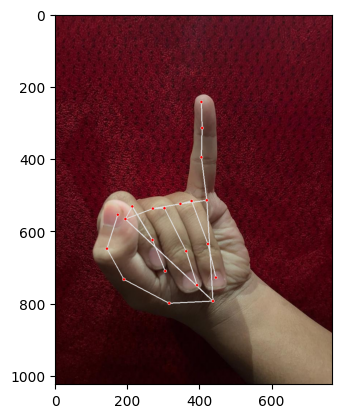

In [155]:
# Directly from Imageset Dataset Testing
#Load Image and do Feature Extraction
path_to_image = "/content/drive/MyDrive/Data Bisindo/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/test/Copy of I.jpeg"
#path_to_image = "/content/drive/MyDrive/Data Bisindo/newdata/newdata/U.jpeg"
(wristX, wristY, wristZ,
 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
 thumb_McpX, thumb_McpY, thumb_McpZ,
 thumb_IpX, thumb_IpY, thumb_IpZ,
 thumb_TipX, thumb_TipY, thumb_TipZ,
 index_McpX, index_McpY, index_McpZ,
 index_PipX, index_PipY, index_PipZ,
 index_DipX, index_DipY, index_DipZ,
 index_TipX, index_TipY, index_TipZ,
 middle_McpX, middle_McpY, middle_McpZ,
 middle_PipX, middle_PipY, middle_PipZ,
 middle_DipX, middle_DipY, middle_DipZ,
 middle_TipX, middle_TipY, middle_TipZ,
 ring_McpX, ring_McpY, ring_McpZ,
 ring_PipX, ring_PipY, ring_PipZ,
 ring_DipX, ring_DipY, ring_DipZ,
 ring_TipX, ring_TipY, ring_TipZ,
 pinky_McpX, pinky_McpY, pinky_McpZ,
 pinky_PipX, pinky_PipY, pinky_PipZ,
 pinky_DipX, pinky_DipY, pinky_DipZ,
 pinky_TipX, pinky_TipY, pinky_TipZ,
 output_IMG) = extract_feature(path_to_image)

#print(wristX, wristY,
#      thumb_CmcX, thumb_CmcY, thumb_McpX, thumb_McpY, thumb_IpX, thumb_IpY, thumb_TipX, thumb_TipY,
#      index_McpX, index_McpY, index_PipX, index_PipY, index_DipX, index_DipY, index_TipX, index_TipY,
#      middle_McpX, middle_McpY, middle_PipX, middle_PipY, middle_DipX, middle_DipY, middle_TipX, middle_TipY,
#      ring_McpX, ring_McpY, ring_PipX, ring_PipY, ring_DipX, ring_DipY, ring_TipX, ring_TipY,
#      pinky_McpX, pinky_McpY, pinky_PipX, pinky_PipY, pinky_DipX, pinky_DipY, pinky_TipX, pinky_TipY)
plt.axis("on")
plt.imshow(cv.cvtColor(output_IMG, cv.COLOR_BGR2RGB))
plt.show()

In [156]:
#Shape the image features into an 1x3 array.
input_IMG = np.array([[[wristX], [wristY], [wristZ],
                     [thumb_CmcX], [thumb_CmcY], [thumb_CmcZ],
                     [thumb_McpX], [thumb_McpY], [thumb_McpZ],
                     [thumb_IpX], [thumb_IpY], [thumb_IpZ],
                     [thumb_TipX], [thumb_TipY], [thumb_TipZ],
                     [index_McpX], [index_McpY], [index_McpZ],
                     [index_PipX], [index_PipY], [index_PipZ],
                     [index_DipX], [index_DipY], [index_DipZ],
                     [index_TipX], [index_TipY], [index_TipZ],
                     [middle_McpX], [middle_McpY], [middle_McpZ],
                     [middle_PipX], [middle_PipY], [middle_PipZ],
                     [middle_DipX], [middle_DipY], [middle_DipZ],
                     [middle_TipX], [middle_TipY], [middle_TipZ],
                     [ring_McpX], [ring_McpY], [ring_McpZ],
                     [ring_PipX], [ring_PipY], [ring_PipZ],
                     [ring_DipX], [ring_DipY], [ring_DipZ],
                     [ring_TipX], [ring_TipY], [ring_TipZ],
                     [pinky_McpX], [pinky_McpY], [pinky_McpZ],
                     [pinky_PipX], [pinky_PipY], [pinky_PipZ],
                     [pinky_DipX], [pinky_DipY], [pinky_DipZ],
                     [pinky_TipX], [pinky_TipY], [pinky_TipZ]]])

print(input_IMG.shape)
print(input_IMG)

(1, 63, 1)
[[[436.115]
  [794.989]
  [ -0.   ]
  [315.758]
  [800.917]
  [ -0.121]
  [190.224]
  [734.779]
  [ -0.19 ]
  [143.938]
  [649.532]
  [ -0.253]
  [173.526]
  [555.257]
  [ -0.301]
  [194.178]
  [567.858]
  [ -0.095]
  [213.151]
  [532.14 ]
  [ -0.207]
  [269.326]
  [625.546]
  [ -0.261]
  [304.556]
  [711.245]
  [ -0.267]
  [270.706]
  [538.053]
  [ -0.074]
  [302.227]
  [537.715]
  [ -0.206]
  [362.196]
  [656.44 ]
  [ -0.257]
  [392.877]
  [750.404]
  [ -0.254]
  [346.864]
  [525.006]
  [ -0.07 ]
  [377.452]
  [517.728]
  [ -0.208]
  [422.584]
  [636.116]
  [ -0.234]
  [444.006]
  [729.447]
  [ -0.2  ]
  [419.332]
  [515.844]
  [ -0.073]
  [404.969]
  [396.66 ]
  [ -0.143]
  [406.534]
  [315.957]
  [ -0.158]
  [404.836]
  [243.362]
  [ -0.143]]]


In [157]:
pred = model.predict(input_IMG)

1/1 [==============================] - 0s 292ms/step


In [158]:
pred

array([[0.057, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.743,
        0.001, 0.   , 0.001, 0.015, 0.005, 0.001, 0.   , 0.   , 0.   ,
        0.009, 0.   , 0.   , 0.   , 0.   , 0.   , 0.167, 0.   ]],
      dtype=float32)

In [159]:
label_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
predicted_labels = np.argmax(pred, axis=-1)

predicted_categorical = tf.one_hot(predicted_labels, depth=26)

predicted_probs = tf.nn.softmax(predicted_categorical)

predicted_labels_str = [label_names[i] for i in predicted_labels]

print(predicted_labels_str)

['I']


In [ ]:
test_image = r'/content/drive/MyDrive/Coba/Gambar WhatsApp 2023-05-04 pukul 12.46.51.jpg'
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
plt.title("Isyarat")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image = mpimg.imread(test_image)
plt.imshow(image)
plt.show()

In [ ]:
test_image = r'/content/drive/MyDrive/Coba/Gambar WhatsApp 2023-05-04 pukul 12.46.51.jpg'
(wristX, wristY, wristZ,
 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
 thumb_McpX, thumb_McpY, thumb_McpZ,
 thumb_IpX, thumb_IpY, thumb_IpZ,
 thumb_TipX, thumb_TipY, thumb_TipZ,
 index_McpX, index_McpY, index_McpZ,
 index_PipX, index_PipY, index_PipZ,
 index_DipX, index_DipY, index_DipZ,
 index_TipX, index_TipY, index_TipZ,
 middle_McpX, middle_McpY, middle_McpZ,
 middle_PipX, middle_PipY, middle_PipZ,
 middle_DipX, middle_DipY, middle_DipZ,
 middle_TipX, middle_TipY, middle_TipZ,
 ring_McpX, ring_McpY, ring_McpZ,
 ring_PipX, ring_PipY, ring_PipZ,
 ring_DipX, ring_DipY, ring_DipZ,
 ring_TipX, ring_TipY, ring_TipZ,
 pinky_McpX, pinky_McpY, pinky_McpZ,
 pinky_PipX, pinky_PipY, pinky_PipZ,
 pinky_DipX, pinky_DipY, pinky_DipZ,
 pinky_TipX, pinky_TipY, pinky_TipZ,
 output_IMG) = extract_feature(test_image)

plt.axis("on")
plt.imshow(cv.cvtColor(output_IMG, cv.COLOR_BGR2RGB))
plt.show()

In [ ]:
input_IMG = np.array([[[wristX], [wristY], [wristZ],
                     [thumb_CmcX], [thumb_CmcY], [thumb_CmcZ],
                     [thumb_McpX], [thumb_McpY], [thumb_McpZ],
                     [thumb_IpX], [thumb_IpY], [thumb_IpZ],
                     [thumb_TipX], [thumb_TipY], [thumb_TipZ],
                     [index_McpX], [index_McpY], [index_McpZ],
                     [index_PipX], [index_PipY], [index_PipZ],
                     [index_DipX], [index_DipY], [index_DipZ],
                     [index_TipX], [index_TipY], [index_TipZ],
                     [middle_McpX], [middle_McpY], [middle_McpZ],
                     [middle_PipX], [middle_PipY], [middle_PipZ],
                     [middle_DipX], [middle_DipY], [middle_DipZ],
                     [middle_TipX], [middle_TipY], [middle_TipZ],
                     [ring_McpX], [ring_McpY], [ring_McpZ],
                     [ring_PipX], [ring_PipY], [ring_PipZ],
                     [ring_DipX], [ring_DipY], [ring_DipZ],
                     [ring_TipX], [ring_TipY], [ring_TipZ],
                     [pinky_McpX], [pinky_McpY], [pinky_McpZ],
                     [pinky_PipX], [pinky_PipY], [pinky_PipZ],
                     [pinky_DipX], [pinky_DipY], [pinky_DipZ],
                     [pinky_TipX], [pinky_TipY], [pinky_TipZ]]])

print(input_IMG.shape)
print(input_IMG)